<a href="https://colab.research.google.com/github/WardahAsad/SignEase/blob/main/Logistic_Regression_Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Logistic Regression for Heart Disease Prediction**

## **Objective**  
Train and evaluate a **Logistic Regression model** to predict whether a patient has heart disease based on various features such as age, sex, cholesterol, blood pressure, etc.

---

## **Dataset**  
Download the **Heart Disease Prediction dataset** from Kaggle:  
🔗 [Heart Disease Prediction Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)  

- Load the dataset into a Pandas DataFrame.  
- Display the first few rows to understand the structure.  

---

## **Tasks**  

### **1. Data Preprocessing**  
- Check for missing values and handle them appropriately.  
- Convert categorical variables (e.g., sex, chest pain type) into numerical format using **One-Hot Encoding** or **Label Encoding**.  
- Normalize numerical features using **StandardScaler**.  
- Split the dataset into **80% training and 20% testing**.  

---

### **2. Train Logistic Regression Model**  
- Train a **Logistic Regression model** with default parameters (use `LogisticRegression` from `sklearn`).  
- Evaluate the model’s initial performance using accuracy.  

---

### **3. Hyperparameter Tuning**  
- Use **GridSearchCV** to tune the following hyperparameters:  
  - `C` (Inverse of regularization strength)  
  - `solver` (Optimization algorithm, e.g., 'liblinear', 'saga')  
  - `max_iter` (Maximum number of iterations for optimization)  

---

### **4. Model Evaluation**  
- Compute and print the following metrics for both the **default** and **tuned** models:  
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1-Score**  
  - **ROC-AUC Score**  

---

### **5. Visualization**  
- Plot the **Confusion Matrix** to evaluate model performance.  
- Plot the **ROC curve** to visualize the trade-off between True Positive Rate and False Positive Rate.  

---


## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  



In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            roc_curve, ConfusionMatrixDisplay)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load the dataset
df = pd.read_csv('/content/heart.csv')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0     

In [4]:
# Step 2: Data Preprocessing
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Define target and features
X = df.drop('target', axis=1)
y = df['target']



Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:

# Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [6]:

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train initial Logistic Regression model
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [7]:
# Evaluate initial model
print("\nInitial Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")


Initial Model Performance:
Accuracy: 0.82
Precision: 0.78
Recall: 0.89
F1-Score: 0.83
ROC-AUC Score: 0.91


In [8]:
# Step 5: Hyperparameter tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("\nStarting Grid Search...")
grid_search.fit(X_train, y_train)


Starting Grid Search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'thalach',
                                                                          'oldpeak']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'exang',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 500],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='roc_auc', verbose=1)

In [9]:
# Get best model
best_log_reg = grid_search.best_estimator_
y_pred_tuned = best_log_reg.predict(X_test)
y_prob_tuned = best_log_reg.predict_proba(X_test)[:, 1]

In [10]:
# Evaluate tuned model
print("\nTuned Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_tuned):.2f}")


Tuned Model Performance:
Best Parameters: {'classifier__C': 100, 'classifier__max_iter': 200, 'classifier__solver': 'saga'}
Accuracy: 0.80
Precision: 0.77
Recall: 0.87
F1-Score: 0.82
ROC-AUC Score: 0.91


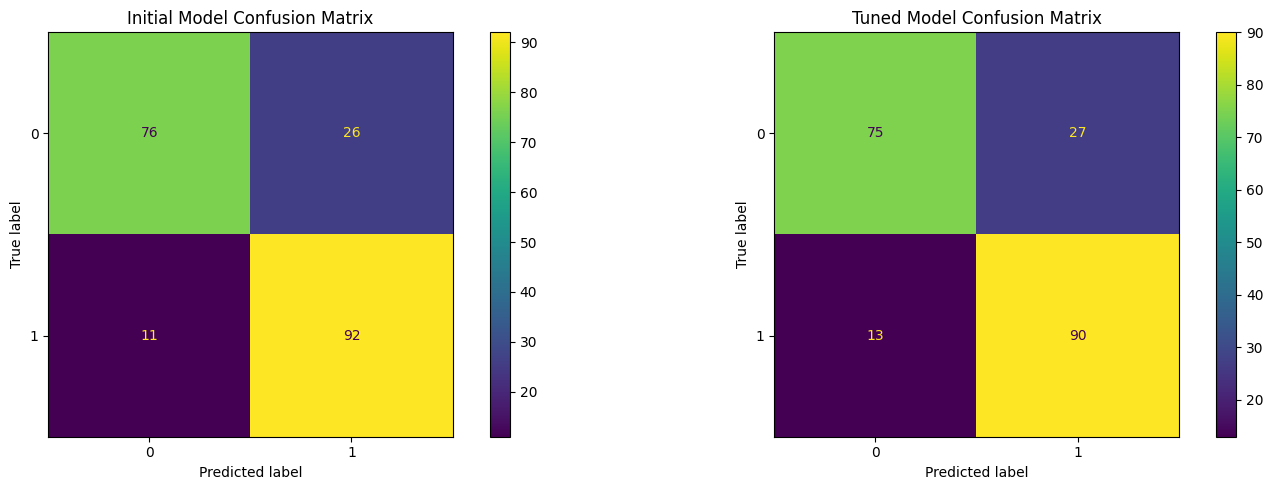

In [11]:
# Step 6: Visualization
# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Initial model
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, ax=ax1)
ax1.set_title('Initial Model Confusion Matrix')

# Tuned model
ConfusionMatrixDisplay.from_estimator(best_log_reg, X_test, y_test, ax=ax2)
ax2.set_title('Tuned Model Confusion Matrix')

plt.tight_layout()
plt.show()

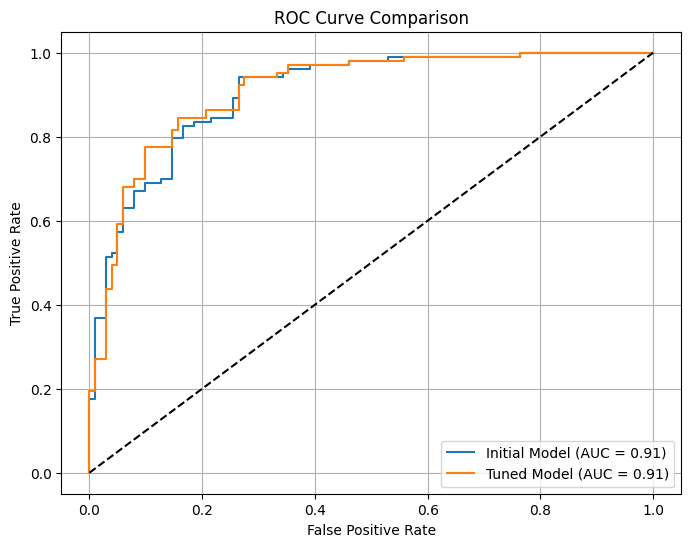

In [12]:
# ROC Curve
plt.figure(figsize=(8, 6))

# Initial model
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Initial Model (AUC = {roc_auc_score(y_test, y_prob):.2f})')

# Tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Model (AUC = {roc_auc_score(y_test, y_prob_tuned):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

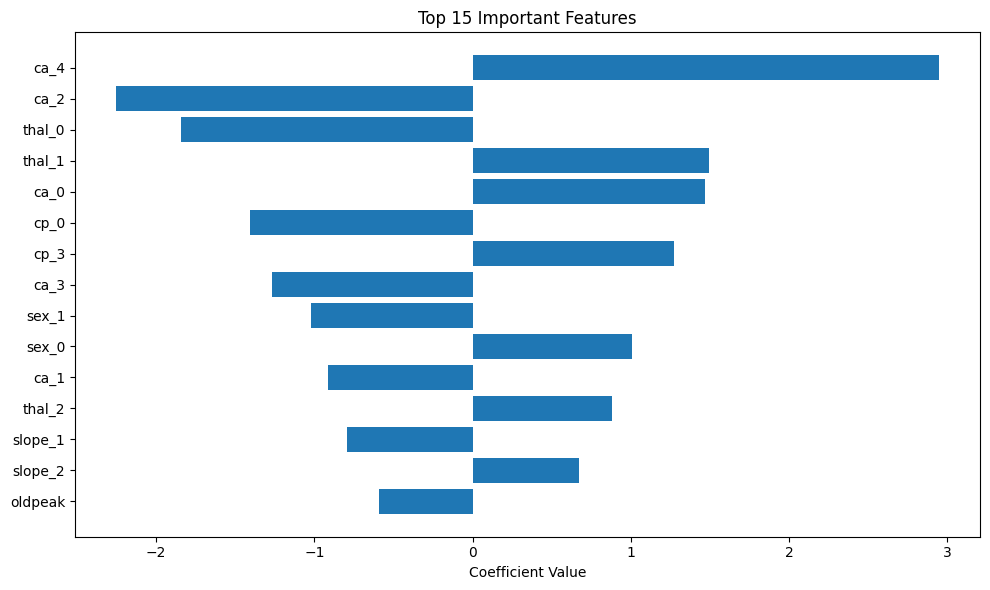

In [13]:
# Step 7: Feature Importance (for numerical features)
# Get coefficients for numerical features
feature_names = numerical_cols + list(best_log_reg.named_steps['preprocessor']
                                    .named_transformers_['cat']
                                    .named_steps['onehot']
                                    .get_feature_names_out(categorical_cols))

coef = best_log_reg.named_steps['classifier'].coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coef})
feature_importance = feature_importance.sort_values('Importance', key=abs, ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
# Create a sample patient data (modify these values as needed)
sample_patient = {
    'age': 58,
    'sex': 1,          # 1 = male, 0 = female
    'cp': 2,           # chest pain type (0-3)
    'trestbps': 125,   # resting blood pressure
    'chol': 236,       # serum cholesterol
    'fbs': 0,          # fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    'restecg': 1,      # resting electrocardiographic results (0-2)
    'thalach': 178,    # maximum heart rate achieved
    'exang': 0,        # exercise induced angina (1 = yes, 0 = no)
    'oldpeak': 0.8,    # ST depression induced by exercise
    'slope': 2,        # slope of peak exercise ST segment
    'ca': 1,           # number of major vessels colored by fluoroscopy (0-3)
    'thal': 2          # thalassemia (1-3)
}

# Convert sample to DataFrame
sample_df = pd.DataFrame([sample_patient])

# Make predictions
initial_pred = log_reg.predict(sample_df)
initial_prob = log_reg.predict_proba(sample_df)[:, 1]

tuned_pred = best_log_reg.predict(sample_df)
tuned_prob = best_log_reg.predict_proba(sample_df)[:, 1]

# Display results
print("\nSample Patient Prediction Results:")
print("Patient Features:")
print(sample_df)
print("\nInitial Model Prediction:")
print(f"Predicted Class: {'Heart Disease' if initial_pred[0] == 1 else 'No Heart Disease'}")
print(f"Probability of Heart Disease: {initial_prob[0]:.2%}")

print("\nTuned Model Prediction:")
print(f"Predicted Class: {'Heart Disease' if tuned_pred[0] == 1 else 'No Heart Disease'}")
print(f"Probability of Heart Disease: {tuned_prob[0]:.2%}")

# Interpretation
print("\nInterpretation Guide:")
print("- Probability ≥ 50% predicts Heart Disease (class 1)")
print("- Probability < 50% predicts No Heart Disease (class 0)")
print("- Higher probability indicates higher confidence in prediction")


Sample Patient Prediction Results:
Patient Features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   58    1   2       125   236    0        1      178      0      0.8      2   

   ca  thal  
0   1     2  

Initial Model Prediction:
Predicted Class: Heart Disease
Probability of Heart Disease: 84.26%

Tuned Model Prediction:
Predicted Class: Heart Disease
Probability of Heart Disease: 85.86%

Interpretation Guide:
- Probability ≥ 50% predicts Heart Disease (class 1)
- Probability < 50% predicts No Heart Disease (class 0)
- Higher probability indicates higher confidence in prediction
